In [113]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, f1_score, precision_score, recall_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
import sklearn.tree as tree
import graphviz
from IPython.display import Image, display
from os import system
import sklearn.svm as svm

In [2]:
abalone_data = pd.read_csv('abalone.csv')
abalone_data.head()

,Sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_data.shape

(4177, 9)

In [4]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_data.isnull().sum()

Sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [7]:
abalone_data.duplicated().sum()

0

In [49]:
print(len(abalone_data['rings'].unique()))
abalone_data['rings'].unique()

28


array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [12]:
abalone_data['rings'].min(), abalone_data['rings'].max()

(1, 29)

In [18]:
abalone_data.groupby('Sex').mean()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [28]:
abalone_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


# Visualization

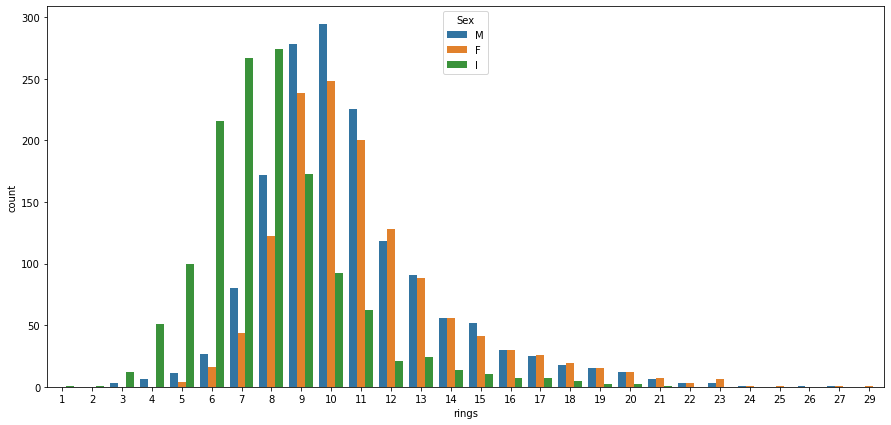

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(abalone_data['rings'], hue=abalone_data['Sex'])
plt.show()

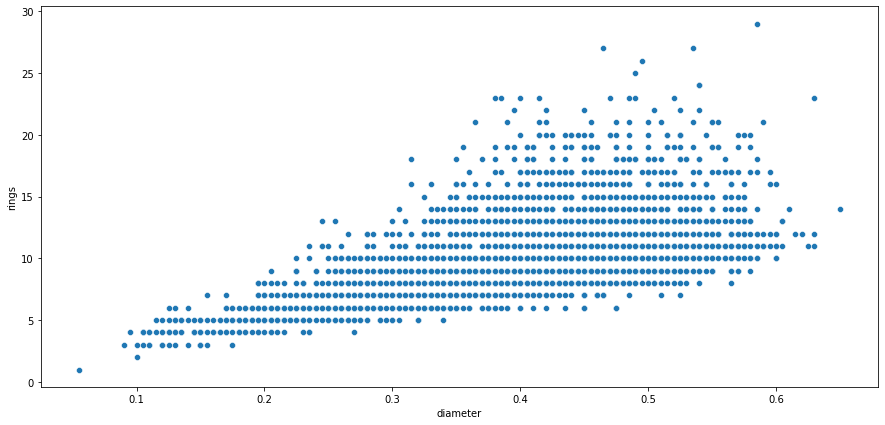

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(abalone_data['diameter'], abalone_data['rings'])
plt.show()

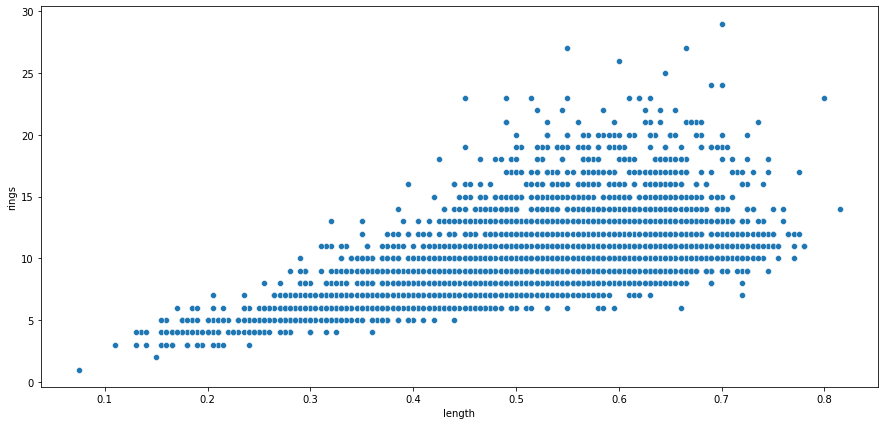

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(abalone_data['length'], abalone_data['rings'])
plt.show()

# Insights:

As the range of diameter increases, the number of rings increases. From the above diagram, the abalones with diameter of range [0.1 , 0.35] will have 5 Rings. etc. Same applies for rings and length

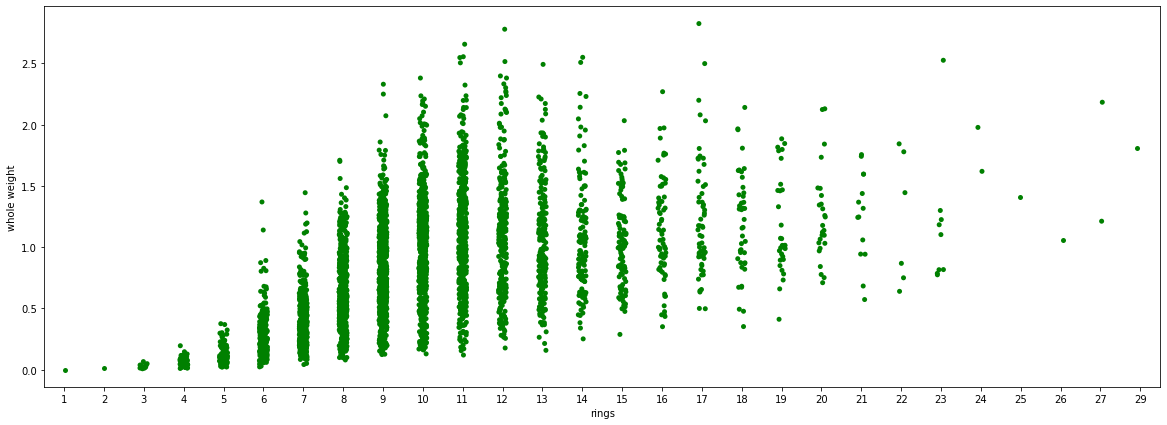

In [24]:
plt.figure(figsize=(20,7))
sns.stripplot(abalone_data['rings'], abalone_data['whole weight'], palette=['green'])
plt.show()

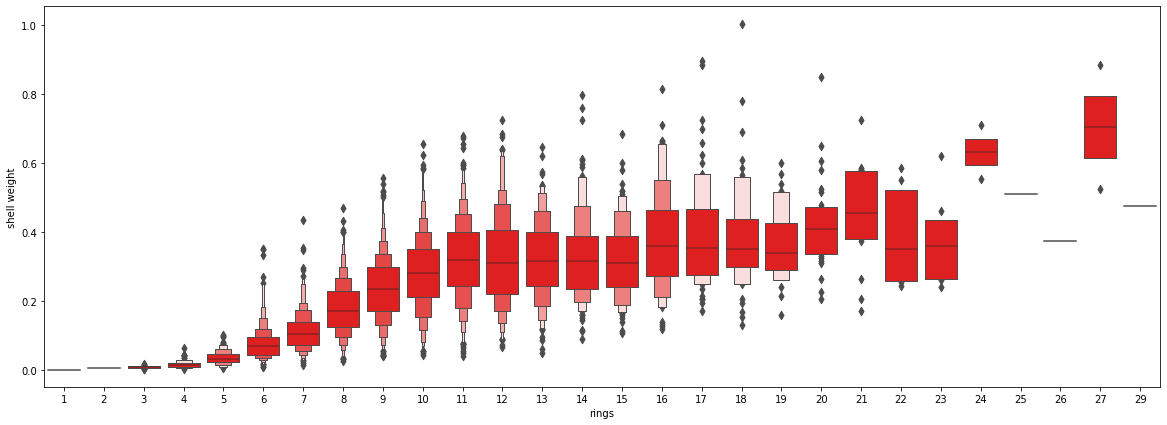

In [26]:
plt.figure(figsize=(20,7))
sns.boxenplot(abalone_data['rings'], abalone_data['shell weight'], palette=['red'])
plt.show()

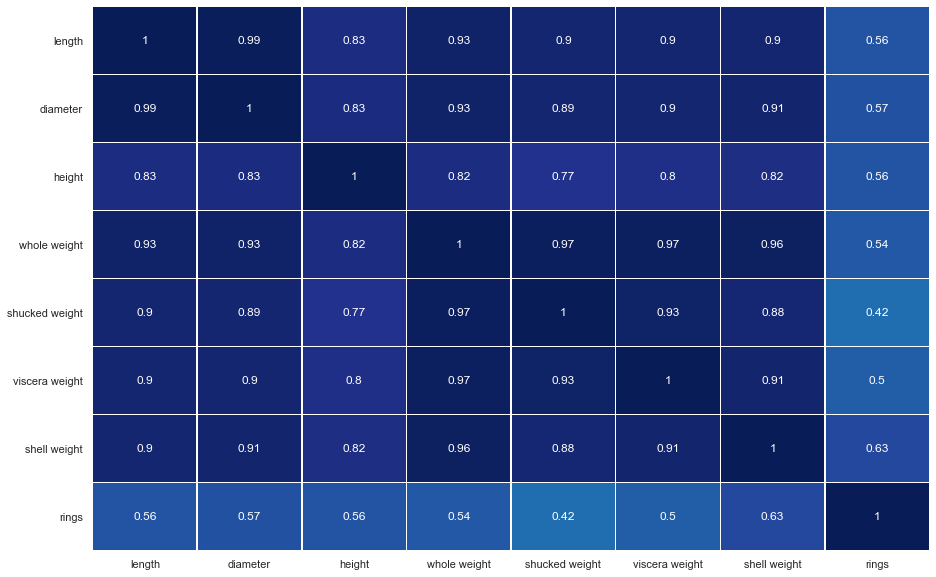

In [29]:
sns.set(rc={'figure.figsize': (15,10)})
sns.heatmap(abalone_data.corr(), annot=True, linewidths=.5, center=0, cbar=False, cmap="YlGnBu")
plt.show()

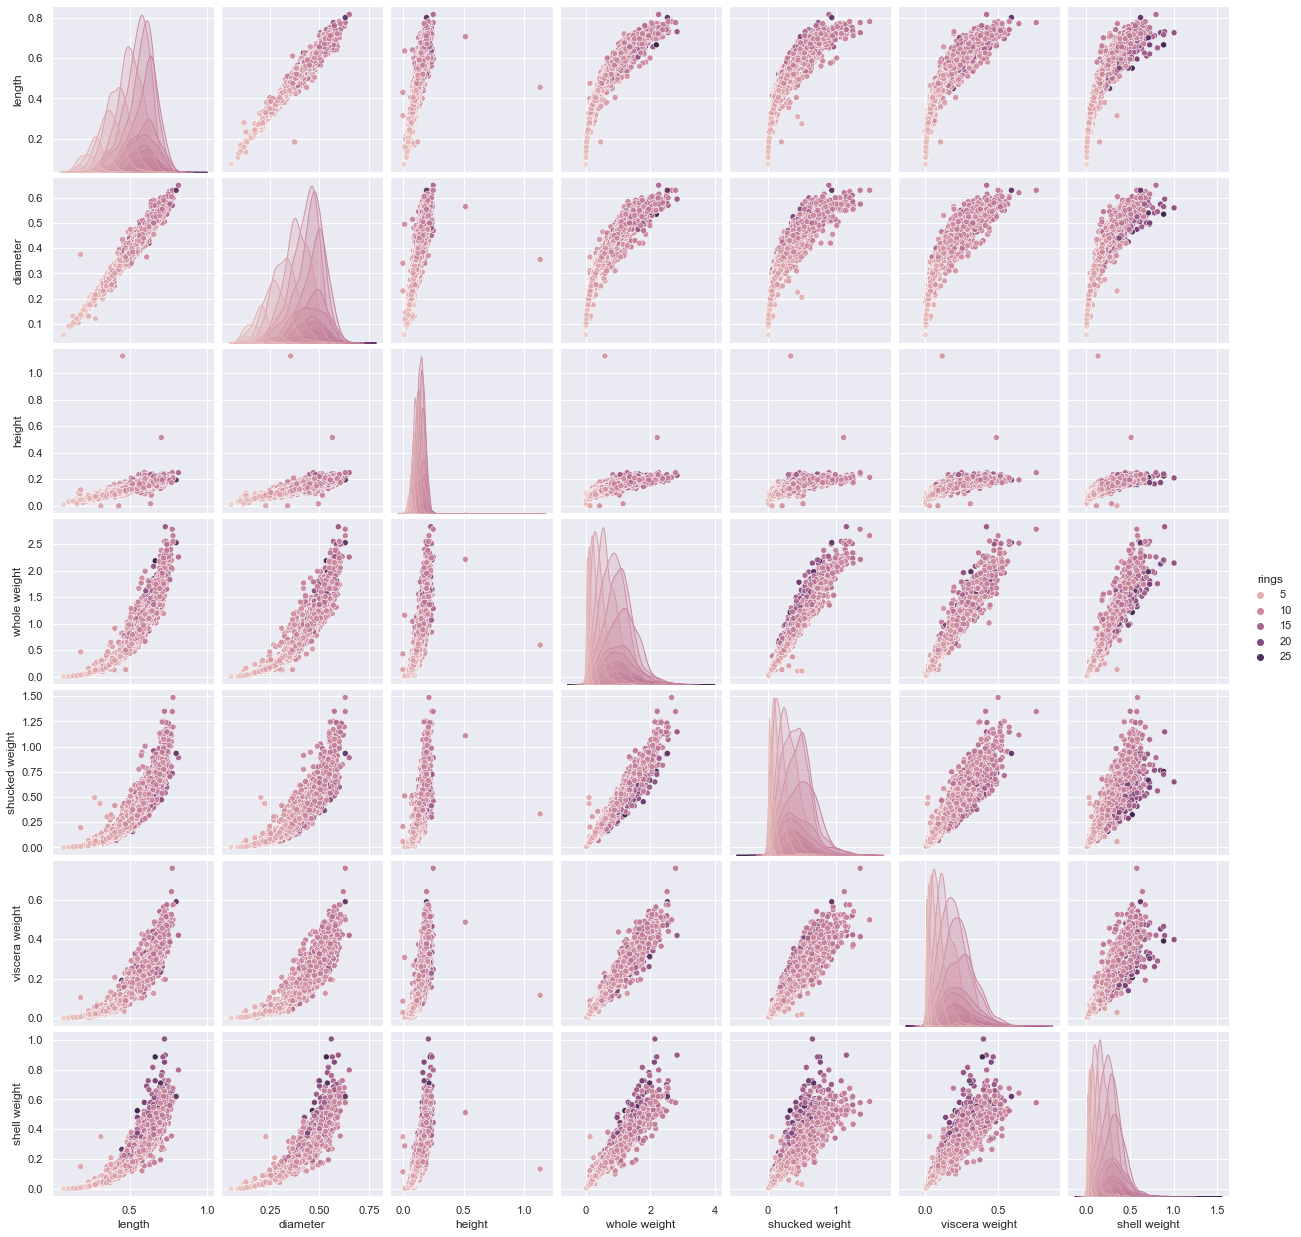

In [30]:
sns.pairplot(abalone_data,hue='rings')

# Prepare the data

In [31]:
abalone_data = pd.get_dummies(abalone_data, drop_first=True)
abalone_data.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


In [32]:
X = abalone_data.drop('rings', axis=1)
y = abalone_data['rings']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Logistic Regression

In [37]:
log_reg = LogisticRegression(solver='saga')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [39]:
y_predict = log_reg.predict(X_test)

In [82]:
print(len(y_test.unique()))

22


<AxesSubplot:>

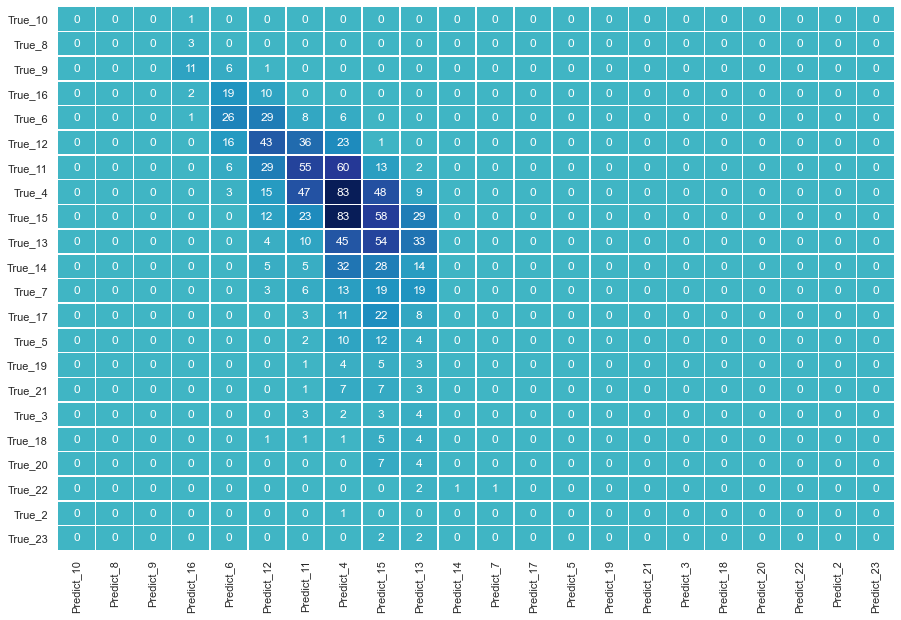

In [64]:
cm = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(cm, columns=['Predict_'+str(i) for i in y_test.unique()], index=['True_'+str(i) for i in y_test.unique()])
cm_df
sns.heatmap(cm_df, annot=True, linewidths=.5, center=0, cbar=False, cmap="YlGnBu")

In [67]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           2       0.00      0.00      0.00         1\n           3       0.00      0.00      0.00         3\n           4       0.00      0.00      0.00        18\n           5       0.11      0.06      0.08        31\n           6       0.34      0.37      0.36        70\n           7       0.28      0.36      0.32       119\n           8       0.27      0.33      0.30       165\n           9       0.22      0.40      0.28       205\n          10       0.20      0.28      0.24       205\n          11       0.24      0.23      0.23       146\n          12       0.00      0.00      0.00        84\n          13       0.00      0.00      0.00        60\n          14       0.00      0.00      0.00        44\n          15       0.00      0.00      0.00        28\n          16       0.00      0.00      0.00        13\n          17       0.00      0.00      0.00        18\n          18       0.00      0.00      0.00        12\n       

In [115]:
def print_metrics(y_test, y_predict):
    print('Accuracy: {}'.format(accuracy_score(y_test, y_predict)))
    print('Precision: {}'.format(precision_score(y_test, y_predict, average='weighted')))
    print('Recall: {}'.format(recall_score(y_test, y_predict, average='weighted')))
print_metrics(y_test, y_predict)
coefficient_df = pd.DataFrame(log_reg.coef_, columns=X_train.columns)
coefficient_df['interceptor'] = log_reg.intercept_
coefficient_df.transpose()

Accuracy: 0.2503987240829346
Precision: 0.21826939622431898
Recall: 0.2503987240829346


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
length,-0.400948,-2.215453,-3.387064,-2.669682,-0.920335,0.376243,2.585737,2.173071,1.167506,1.005092,...,0.226503,0.176322,0.338383,0.103553,0.081452,0.206506,0.092377,0.057185,0.045916,0.127324
diameter,-0.313278,-1.732331,-2.743866,-2.236280,-0.965926,-0.099752,1.280040,1.495777,0.743983,1.198443,...,0.160434,0.291039,0.266638,0.124062,0.095611,0.150852,0.058057,0.071050,0.082575,0.136686
height,-0.114986,-0.578702,-0.871315,-0.830860,-0.336957,-0.268145,0.172581,-0.497316,-0.119466,-0.119631,...,0.183716,0.143936,0.135627,0.180253,0.089926,0.077154,0.066070,0.049219,0.086442,0.030119
whole weight,-0.593219,-2.958726,-4.521570,-5.069402,-3.182944,-2.653835,-2.060838,-1.568150,-0.005483,0.685746,...,1.504469,1.851882,1.131630,1.225087,0.330775,1.369394,0.511308,0.206324,1.240335,0.827753
shucked weight,-0.252215,-1.258760,-1.955643,-1.679469,-0.378545,1.396846,3.451208,4.603476,2.589250,2.143141,...,-0.301977,-0.289249,-0.250955,-0.119879,-0.231028,0.252944,0.047369,0.023172,0.163209,0.289069
viscera weight,-0.128774,-0.646086,-0.981708,-1.115974,-0.837663,-0.718762,-0.272319,0.579570,0.664816,0.949269,...,0.241787,0.239935,0.057526,0.006231,0.002643,0.183712,0.033870,0.004750,0.129710,0.108663
shell weight,-0.176350,-0.907827,-1.418828,-1.719690,-2.018572,-2.661379,-3.191738,-2.774643,-1.313200,-0.769664,...,0.681891,1.511510,0.844424,0.542545,0.276711,0.618102,0.247090,0.124417,0.781674,0.188977
Sex_I,0.500940,0.840704,1.468253,1.177934,1.424811,1.069284,0.649984,-0.039968,-0.262223,-0.147281,...,-1.094848,-0.298044,-0.398814,-0.510502,-0.746975,-0.252038,-0.229861,-0.186422,-0.266358,-0.205478
Sex_M,-0.248643,0.233919,-0.108325,-0.320418,-0.001378,0.253552,0.101039,-0.108993,0.076565,-0.073775,...,0.198980,0.214497,-0.164565,0.303137,-0.140764,0.054393,-0.351655,0.460733,0.058763,-0.360152
interceptor,-1.884072,2.826797,4.706887,5.496986,4.537307,3.956357,2.350767,2.099630,1.739800,0.682649,...,-1.342732,-2.418449,-1.659201,-2.421297,-1.165029,-3.682906,-3.024501,-3.065196,-3.417377,-3.454570


# K- Nearest Neighbors

In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_predict = knn_classifier.predict(X_test)

print_metrics(y_test, y_predict)

Accuracy: 0.20574162679425836
Precision: 0.19021005185205217
Recall: 0.20574162679425836


# Decision Tree

In [90]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)

print_metrics(y_test, y_predict)

Accuracy: 0.18022328548644337
Precision: 0.1771415474266325
Recall: 0.18022328548644337


In [104]:
abalone_tree_file = open('abalone_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=abalone_tree_file, feature_names=list(X_train))
abalone_tree_file.close()
dot_data

# display(graphviz.Source(dot_data))

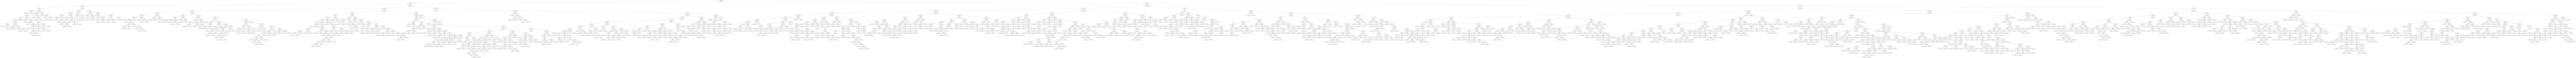

In [108]:
retCode = system("dot -Tpng abalone_tree.dot -o abalone_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("abalone_tree.png"))

In [110]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_leaf=25, min_samples_split=100)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)

print_metrics(y_test, y_predict)

Accuracy: 0.2503987240829346
Precision: 0.21826939622431898
Recall: 0.2503987240829346


In [111]:
abalone_tree_file = open('abalone_tree_pruned.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=abalone_tree_file, feature_names=list(X_train))
abalone_tree_file.close()
dot_data

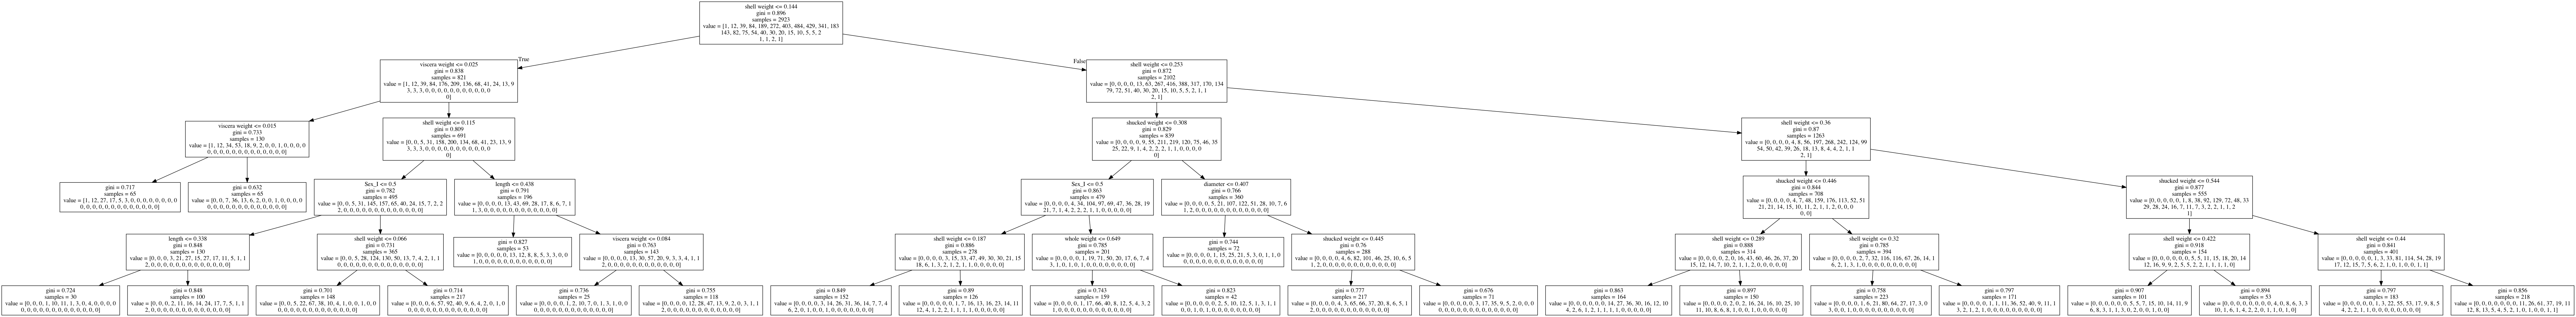

In [112]:
retCode = system("dot -Tpng abalone_tree_pruned.dot -o abalone_tree_pruned.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("abalone_tree_pruned.png"))

# Support Vector Machine

In [118]:
svm_classifier = svm.SVC(decision_function_shape='ovo')
svm_classifier.fit(X_train, y_train)
y_predict = svm_classifier.predict(X_test)

print_metrics(y_test, y_predict)

Accuracy: 0.24880382775119617
Precision: 0.20319368076729508
Recall: 0.24880382775119617


# Conclusion:

So far th best model for the dataset is pruned decision tree